# K-Means Clustering
##### Ing. Luis Felipe Narvaez Gomez. E-mail: luis.narvaez@usantoto.edu.co. Cod: 2312660. Facultad de Ingenieria de Sistemas. USTA

References: https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

### K-means: Example Color Compression

Una aplicación interesante del agrupamiento es la compresión de color dentro de las imágenes. Por ejemplo, imagina que tienes una imagen con millones de colores. En la mayoría de las imágenes, una gran cantidad de colores no se usarán y muchos de los píxeles de la imagen tendrán colores similares o incluso idénticos.

Por ejemplo, considere la imagen que se muestra en la siguiente figura, que es del módulo **Scikit-Learn datasets**

Nota: Debe tener instalado Python Pillow, si no no funcionara :"v

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

In [2]:
from IPython.display import Image

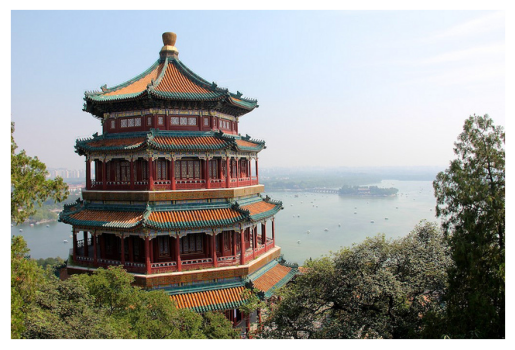

In [3]:
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

La imagen en sí se almacena en una matriz tridimensional de tamaño con los siguientes parametros:

$( HEIGHT , WIDTH , RGB )$

Estos contiene contribuciones de rojo/azul/verde que poseen una resolucion de 0 --> 255.

In [4]:
china.shape

(427, 640, 3)

Una forma en que podemos ver este conjunto de píxeles es como una nube de puntos en un espacio de color tridimensional.

Reformaremos los datos a **[n_samples x n_features]**, y cambiaremos la escala de los colores para que estén entre 0 y 1:

In [5]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

Podemos visualizar estos píxeles en este espacio de color, usando un subconjunto de 10 000 píxeles para mayor eficiencia:

In [6]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20)

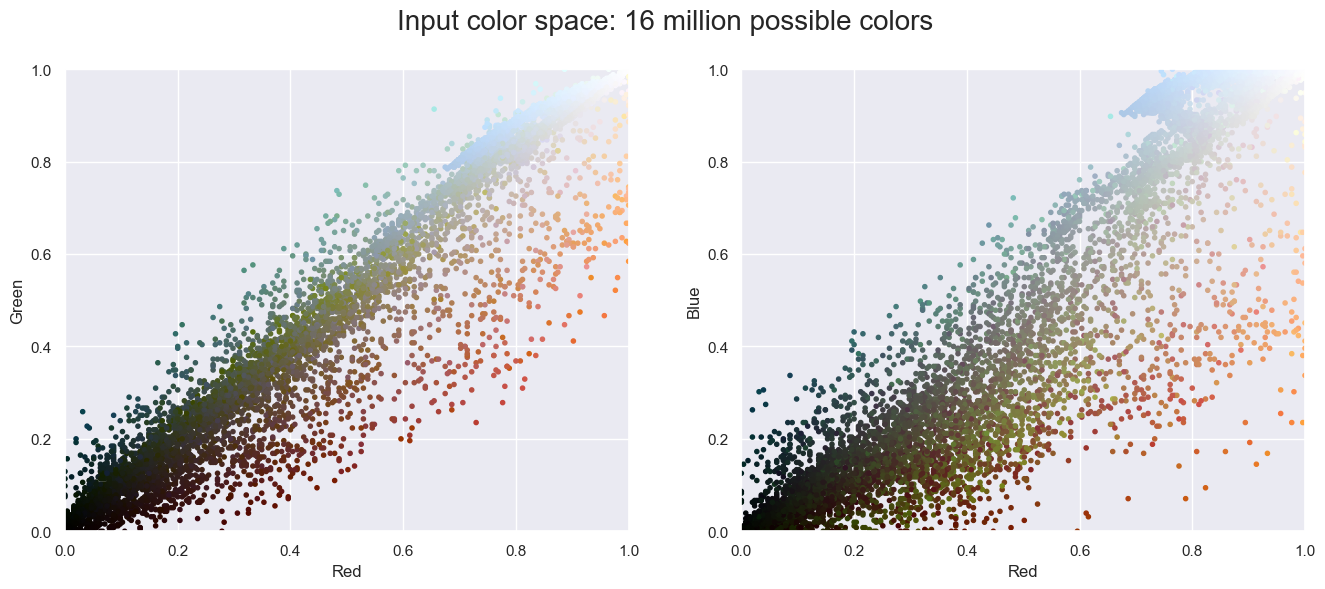

In [7]:
plot_pixels(data, title='Input color space: 16 million possible colors')

Ahora, reduzcamos estos 16 millones de colores a solo 16 colores, usando un agrupamiento de k -means en el espacio de píxeles.

Debido a que estamos tratando con un conjunto de datos muy grande, usaremos el mini lote k -means, que opera en subconjuntos de datos para calcular el resultado mucho más rápido que el algoritmo estándar k -means:

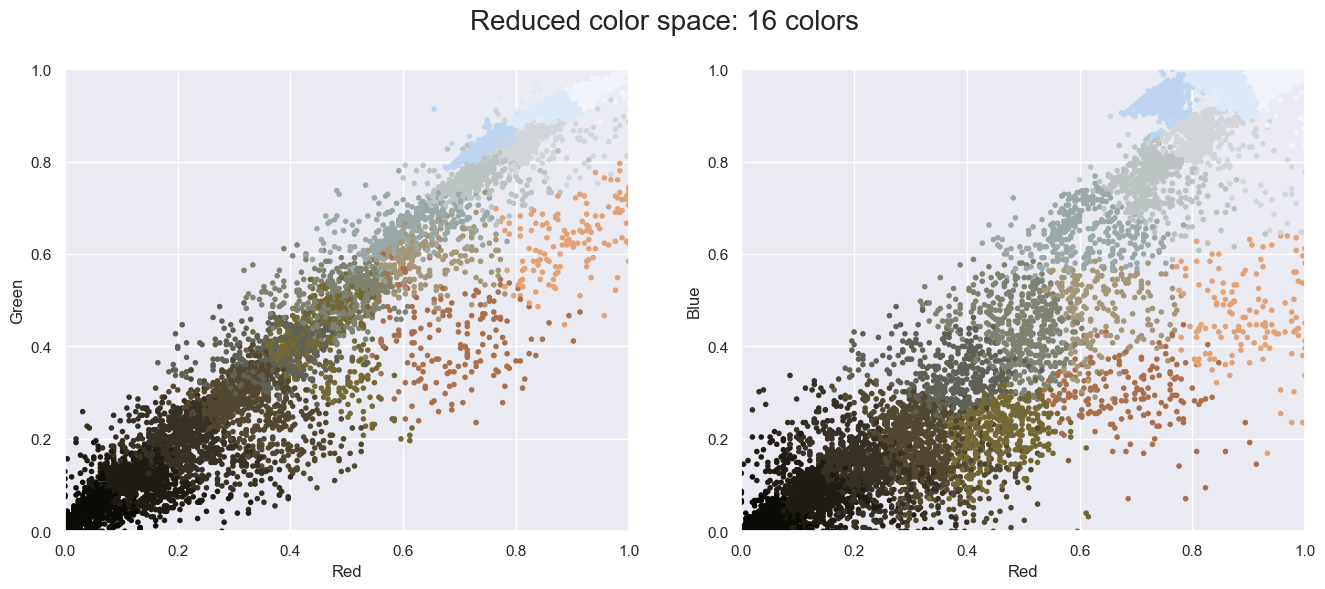

In [8]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

El resultado es una nueva coloración de los píxeles originales, donde a cada píxel se le asigna el color de su centro de grupo más cercano. 

Trazar estos nuevos colores en el espacio de la imagen en lugar del espacio de píxeles nos muestra el efecto de esto:

Text(0.5, 1.0, '16-color Image')

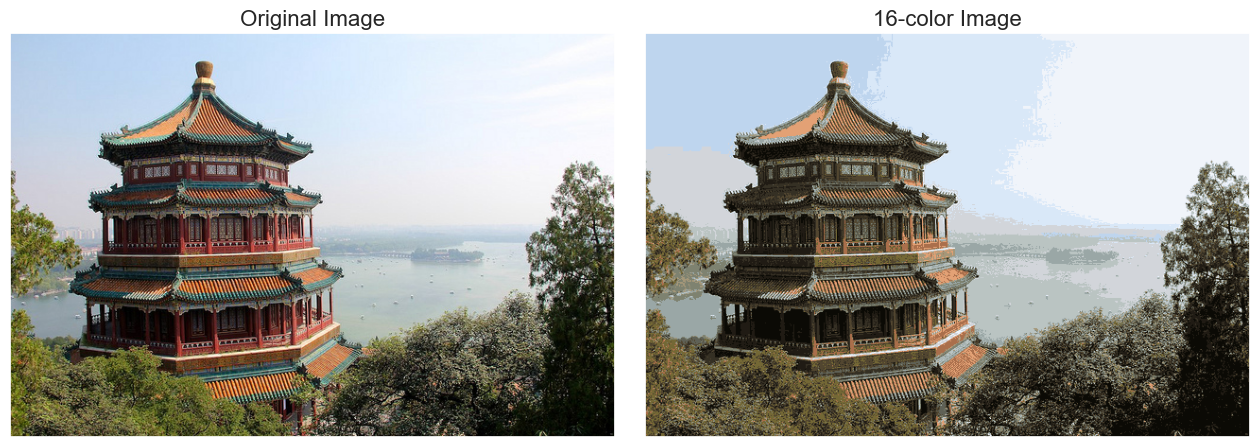

In [9]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16)

Ciertamente se pierden algunos detalles en el panel más a la derecha, pero la imagen general sigue siendo fácilmente reconocible.

**¡Esta imagen de la derecha logra un factor de compresión de alrededor de 1 millón!**

Si bien esta es una aplicación interesante de k -means, ciertamente hay mejores formas de comprimir información en imágenes. Pero el ejemplo muestra el poder de pensar fuera de la caja con métodos no supervisados ​​como k -means.